0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[1. 1.]
[2. 2.]
[3. 3.]
[4. 4.]
[5. 5.]
[6. 6.]
[7. 7.]
[8. 8.]
[9. 9.]
[10. 10.]
[11. 11.]
[12. 12.]
[13.  3.]
[14. 14.]
[15. 15.]
[16. 16.]
[17. 17.]
[18. 18.]
[19. 14.]
[20. 20.]
[21. 21.]
[22. 22.]
[23. 23.]
[24. 24.]
[25. 25.]
[26. 26.]
[27. 27.]
[28. 28.]
[29. 29.]
[30. 30.]
[31. 31.]
[32. 32.]
[33. 33.]
[34. 34.]
[35. 35.]
[36. 36.]
[37. 37.]
[38. 38.]
[39. 55.]
[40. 40.]
[41. 41.]
[42. 42.]
[43. 43.]
[44. 44.]
[45. 45.]
[46. 46.]
[47. 99.]
[48. 48.]
[49. 49.]
[50. 50.]
[51. 17.]
[52. 18.]
[53. 53.]
[54. 54.]
[55. 55.]
[56. 56.]
[57. 57.]
[58. 58.]
[59. 59.]
[60. 60.]
[61. 61.]
[62. 16.]
[63. 63.]
[64. 64.]
[65. 14.]
[66. 66.]
[67. 25.]
[68. 68.]
[69. 69.]
[70. 70.]
[71. 71.]
[72. 72.]
[73. 73.

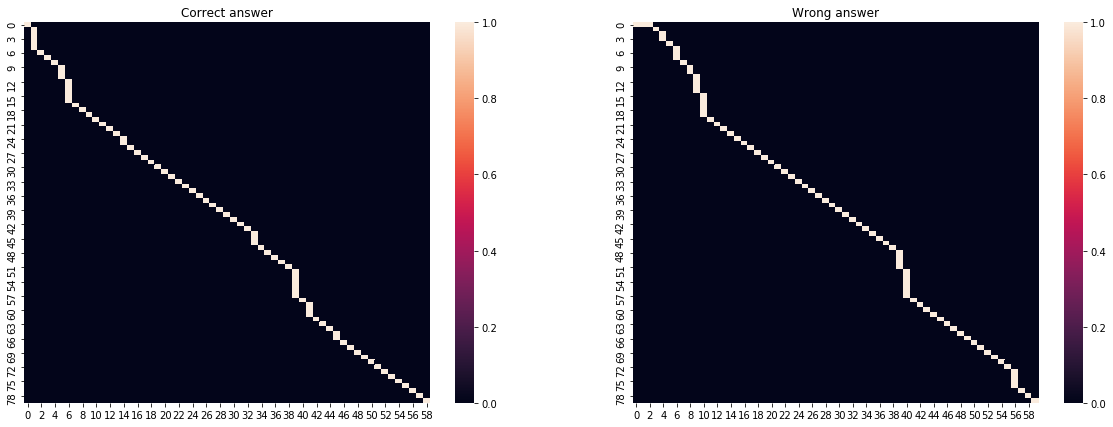

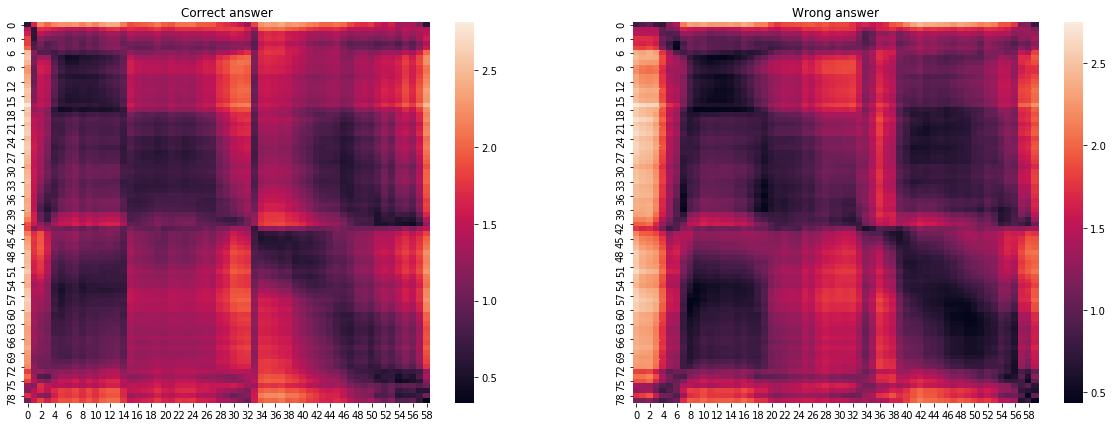

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

class WordSpeechRecognition:
    def __init__(self):
        pass
    
    def dataSet(self, talker, talkNum):
        data = []
        info = []
        talker = str(talker)
        talkNum = str(talkNum)
        for wordNum in range(100):
            fileName = "city0" + talker + talkNum + "/city0" + talker + talkNum + "_" + "{:0=3}".format(wordNum + 1) + ".txt"
            f = open(fileName)
            textList = f.read().split() # データ読み込み

            info.append(textList[0 : 3]) # 情報部分抽出
            frame = int(textList[2]) # フレーム数格納
            strData = textList[3 : len(textList)] # データ部分抽出
            numData = list(map(float, strData)) # floatに変換
            arrayData = np.array(numData) # 行列にする

            tempData = list(np.reshape(arrayData, (frame, 15))) # データをフレームごとに分ける
            data.append(tempData) # 100個の行列のリストを作る
            
        f.close()
        return data, info
        
    def CalcDistance(self, wordNum1, wordNum2, data1, data2):  #13:50 
        line = int(data1[1][wordNum1][2])
        row = int(data2[1][wordNum2][2])
        d = np.zeros((line, row))
        
        for i in range(line):
            for j in range(row):
                sum = 0
                for k in range(15):
                    sum += (data1[0][wordNum1][i][k] - data2[0][wordNum2][j][k]) ** 2
                
                d[i][j] = math.sqrt(sum)

        return d
                
    def DPmatching(self, d):
        lens = d.shape
        g = np.zeros(lens)
        g[0][0] = d[0][0]

        for i in range(1, lens[0]):
            g[i][0] = g[i - 1][0] + d[i][0]
        for j in range(1, lens[1]):
            g[0][j] = g[0][j - 1] + d[0][j]

        for m in range(1, lens[0]):
            for n in range(1, lens[1]):
                g1 = g[m][n - 1] + d[m][n]
                g2 = g[m - 1][n - 1] + 2 * d[m][n]
                g3 = g[m - 1][n] + d[m][n]
                gs = [g1, g2, g3]

                g[m][n] = min(gs)

        min_g = g[-1][-1] / sum(lens)        
        return [min_g, g]
    
    def PathPlot(self, g):
        lens = g.shape
        RoutMap = np.zeros(lens)
        RoutMap[-1][-1] = 1 

        m = lens[0] - 1
        n = lens[1] - 1
        while m != 0 or n != 0:

            refList = [g[m - 1][n], g[m - 1][n - 1], g[m][n - 1]]
                
            minNum = min(refList)
            index = refList.index(minNum)

            if index == 0:
                RoutMap[m - 1][n] = 1
                m = m - 1
            elif index == 1:
                RoutMap[m - 1][n - 1] = 1
                m = m - 1
                n = n - 1
            else:
                RoutMap[m][n - 1] = 1
                n = n - 1

        sns.heatmap(RoutMap)
    
if __name__ == '__main__':
    talker1 = 1
    talknum1 = 1
    talker2 = 2
    talknum2 = 2
    
    wsr = WordSpeechRecognition()
    data1 = wsr.dataSet(talker1, talknum1)
    data2 = wsr.dataSet(talker2, talknum2)
    
    templeteNum = 100
    inputNum = 100
    
    # すべての局所距離を計算する（時間がかかる）
    ds = [[0 for j in range(inputNum)] for i in range(templeteNum)]

    for i in range(templeteNum):  
        for j in range(inputNum):
            ds[i][j] = wsr.CalcDistance(i, j, data1, data2) # (word1, word2)

        print(i)
        
    # 100×100単語を総当たりでDPマッチング
    store_gs_all = [[0 for j in range(inputNum)] for i in range(templeteNum)]

    store_gs = [[0 for j in range(2)] for i in range(100)] #[(列)(行)]　gsを保存する変数
    muchWordNums = np.zeros([inputNum, 2])
    muchWordNums[:,:] = np.nan
    for i in range(templeteNum):  
        for j in range(inputNum):
            temp_gs = wsr.DPmatching(ds[i][j])
            store_gs_all[i][j] = temp_gs

            if j == 0:
                gs = temp_gs
                store_gs[i] = gs
                muchWordNums[i] = [i+1, j+1]
            if j != 0 and gs[0] > temp_gs[0]:
                gs = temp_gs
                store_gs[i] = gs
                muchWordNums[i] = [i+1, j+1]

        print(muchWordNums[i])
        
    # 正答率
    cnt = 0
    for i in range(100):
        if muchWordNums[i][0] == muchWordNums[i][1]:
            cnt = cnt + 1

    print(cnt)
    
    # 経路表示
    correct = 19 - 1
    wrong = 14 - 1

    fig = plt.figure(figsize=(20,7))

    fig.add_subplot(1, 2, 1)
    wsr.PathPlot(store_gs_all[correct][correct][1])
    plt.title('Correct answer')

    fig.add_subplot(1, 2, 2)
    wsr.PathPlot(store_gs_all[correct][wrong][1])
    plt.title('Wrong answer')

    #fig.savefig("pics/1122_1919_1914_path.png")


    print("Correct distance:", store_gs_all[correct][correct][0])
    print("Wrong distance:", store_gs_all[correct][wrong][0])
    
    # ヒートマップ表示
    fig = plt.figure(figsize=(20,7))

    fig.add_subplot(1, 2, 1)
    sns.heatmap(ds[correct][correct])
    plt.title('Correct answer')

    fig.add_subplot(1, 2, 2)
    sns.heatmap(ds[correct][wrong])
    plt.title('Wrong answer')

    #fig.savefig("pics/1122_1919_1914_heat.png")